<AxesSubplot: >

<IPython.core.display.Javascript object>

Text(0.5, 0, 'repeat_day_diff')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'count')

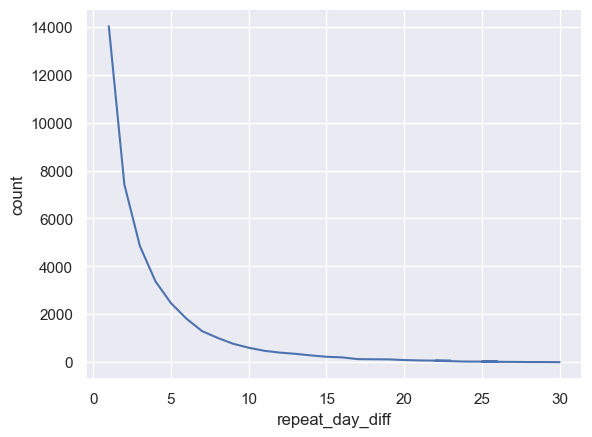

In [99]:
data_user_buy_date_diff.value_counts().plot(kind='line')

plt.xlabel('repeat_day_diff')
plt.ylabel('count')

In [98]:
data_user_buy_date_diff = data_user_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna()).apply(lambda x:x.days)
data_user_buy_date_diff

user_id         
4913       1        6
           2        4
           3        2
           4        3
7528       7        4
                   ..
142455899  49196    2
           49197    2
           49198    4
           49199    3
           49200    1
Name: date, Length: 40315, dtype: int64

<AxesSubplot: >

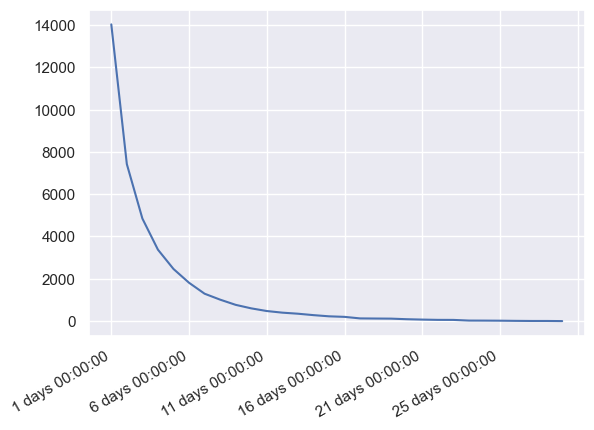

In [97]:
data_user_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna()).value_counts().plot()

In [95]:
data_user_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna()).value_counts()

1 days     14027
2 days      7421
3 days      4849
4 days      3377
5 days      2465
6 days      1813
7 days      1296
8 days      1015
9 days       769
10 days      603
11 days      477
12 days      400
13 days      350
14 days      283
15 days      227
16 days      201
17 days      128
18 days      122
19 days      117
20 days       90
21 days       72
23 days       59
22 days       57
24 days       26
26 days       24
25 days       20
27 days       12
28 days        7
29 days        7
30 days        1
Name: date, dtype: int64

In [94]:
data_user_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna())

user_id         
4913       1       6 days
           2       4 days
           3       2 days
           4       3 days
7528       7       4 days
                    ...  
142455899  49196   2 days
           49197   2 days
           49198   4 days
           49199   3 days
           49200   1 days
Name: date, Length: 40315, dtype: timedelta64[ns]

In [91]:
data_user['action'] = 1 # 对每一行的行为记为1次，通过对行为次数的相加，从而计算频次
data_user_buy = data_user[data_user.behavior_type == 4]
data_user_buy = data_user_buy.groupby(['user_id','date'])['action'].count()
data_user_buy = data_user_buy.reset_index()
data_user_buy.head(30)

,user_id,date,action
0,4913,2014-12-01,1
1,4913,2014-12-07,2
2,4913,2014-12-11,1
3,4913,2014-12-13,1
4,4913,2014-12-16,1
5,6118,2014-12-17,1
6,7528,2014-11-22,1
7,7528,2014-11-26,1
8,7528,2014-11-27,1
9,7528,2014-11-30,1


In [88]:
data_user.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1))

user_id            
4913       7231397       NaT
           10689015   0 days
           7830029    0 days
           834038     0 days
           4137941    0 days
                       ...  
142455899  7372708    0 days
           6697426    0 days
           6697434    0 days
           1344849    0 days
           10059461   0 days
Name: date, Length: 12256906, dtype: timedelta64[ns]

<AxesSubplot: xlabel='date'>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'ARPU')

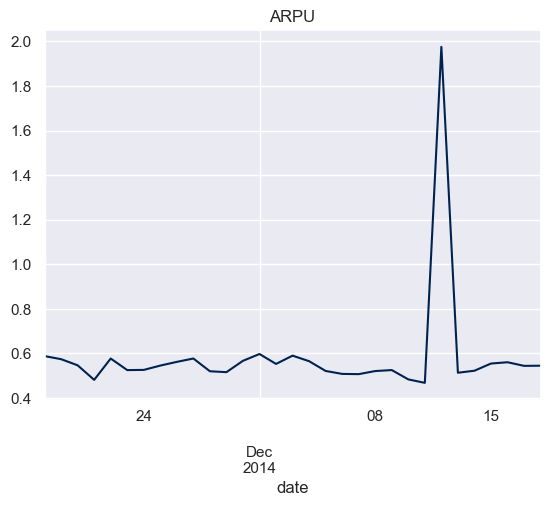

In [84]:
# 可视化
arpu.plot(colormap='cividis')
plt.title('ARPU')

In [83]:
data_user_arpu.groupby('date').apply(lambda x: x[x['behavior_type']==4]['action'].sum() / x['user_id'].nunique())

date
2014-11-18    0.588050
2014-11-19    0.574143
2014-11-20    0.546660
2014-11-21    0.481358
2014-11-22    0.577016
2014-11-23    0.525184
2014-11-24    0.526025
2014-11-25    0.545426
2014-11-26    0.562058
2014-11-27    0.577135
2014-11-28    0.519955
2014-11-29    0.515906
2014-11-30    0.566860
2014-12-01    0.597341
2014-12-02    0.552824
2014-12-03    0.589977
2014-12-04    0.565151
2014-12-05    0.521282
2014-12-06    0.508075
2014-12-07    0.507007
2014-12-08    0.520871
2014-12-09    0.525282
2014-12-10    0.483464
2014-12-11    0.467943
2014-12-12    1.975518
2014-12-13    0.513282
2014-12-14    0.522346
2014-12-15    0.554590
2014-12-16    0.560410
2014-12-17    0.544182
2014-12-18    0.544819
dtype: float64

In [81]:
# 计算arpu，近似公式： ARPU = 每日消费次数 / 每日活跃用户数
arpu = data_user_arpu.groupby('date').apply(lambda x:x[x['behavior_type']==4]['action'].sum() / len(x['user_id'].unique()) )
arpu

date
2014-11-18    0.588050
2014-11-19    0.574143
2014-11-20    0.546660
2014-11-21    0.481358
2014-11-22    0.577016
2014-11-23    0.525184
2014-11-24    0.526025
2014-11-25    0.545426
2014-11-26    0.562058
2014-11-27    0.577135
2014-11-28    0.519955
2014-11-29    0.515906
2014-11-30    0.566860
2014-12-01    0.597341
2014-12-02    0.552824
2014-12-03    0.589977
2014-12-04    0.565151
2014-12-05    0.521282
2014-12-06    0.508075
2014-12-07    0.507007
2014-12-08    0.520871
2014-12-09    0.525282
2014-12-10    0.483464
2014-12-11    0.467943
2014-12-12    1.975518
2014-12-13    0.513282
2014-12-14    0.522346
2014-12-15    0.554590
2014-12-16    0.560410
2014-12-17    0.544182
2014-12-18    0.544819
dtype: float64

In [80]:
# 计算公式为： ARPU = 每日消费总次数 / 每日活跃用户数
#给数据集中每一个用户赋值一个1，表示有登录操作
data_user['action'] = 1

# 得到 date, user_id, behavior_type和计算用户每日的登录次数
data_user_arpu = data_user.groupby(['date','user_id','behavior_type'])['action'].count()
data_user_arpu = data_user_arpu.reset_index()

data_user_arpu.head(20)

,date,user_id,behavior_type,action
0,2014-11-18,4913,1,27
1,2014-11-18,4913,2,1
2,2014-11-18,7591,1,4
3,2014-11-18,12645,1,25
4,2014-11-18,54056,1,13
5,2014-11-18,54056,2,1
6,2014-11-18,54056,4,1
7,2014-11-18,79824,1,40
8,2014-11-18,79824,4,2
9,2014-11-18,88930,1,75


<AxesSubplot: xlabel='user_id'>

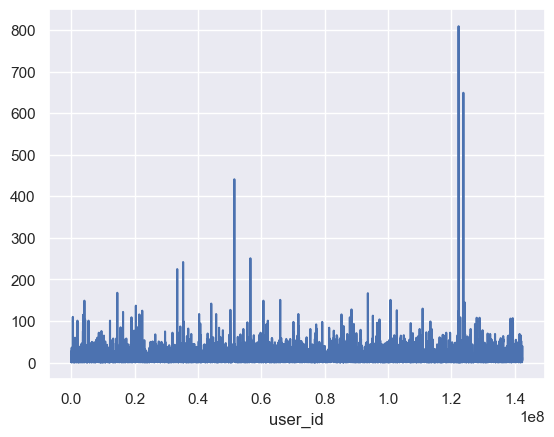

In [79]:
data_user[data_user.behavior_type==4].groupby('user_id')['user_id'].count().plot()

In [74]:
## 浏览 >> 加购/收藏 >> 购买（4）
data_user_buy = data_user[data_user.behavior_type==4].groupby('user_id')['behavior_type'].count()
data_user_buy

user_id
4913          6
6118          1
7528          6
7591         21
12645         8
             ..
142376113     1
142412247    12
142430177     5
142450275    40
142455899    13
Name: behavior_type, Length: 8886, dtype: int64

In [73]:
behavior_type = data_user[data_user['date']=='2014-12-12'].groupby(['behavior_type'])['user_id'].count()
click_num, fav_num, add_num, pay_num =  behavior_type[1], behavior_type[2], behavior_type[3], behavior_type[4]

fav_add_num = fav_num + add_num
print('点击->收藏转化率：', 100 * fav_num / click_num)
print('加购->购买转化率：', 100 * pay_num / add_num)
print('加购/收藏转化率：', 100 * fav_add_num / click_num)
print('点击 到 购买转化率: ', 100 * pay_num / click_num)
print('加购/收藏 到 购买转化率: ', 100 * pay_num / fav_add_num)

点击->收藏转化率： 1.6283532369872815
加购->购买转化率： 62.22866002937816
加购/收藏转化率： 5.448732437837779
点击 到 购买转化率:  2.3773707847303305
加购/收藏 到 购买转化率:  43.631630142472964


In [72]:
behavior_type = data_user.groupby(['behavior_type'])['user_id'].count()
click_num, fav_num, add_num, pay_num =  behavior_type[1], behavior_type[2], behavior_type[3], behavior_type[4]

fav_add_num = fav_num + add_num
print('点击->收藏转化率：', 100 * fav_num / click_num)
print('加购->购买转化率：', 100 * pay_num / add_num)
print('加购/收藏转化率：', 100 * fav_add_num / click_num)
print('点击 到 购买转化率: ', 100 * pay_num / click_num)
print('加购/收藏 到 购买转化率: ', 100 * pay_num / fav_add_num)

点击->收藏转化率： 2.099946314388861
加购->购买转化率： 34.98765877682179
加购/收藏转化率： 5.074376778103197
点击 到 购买转化率:  1.0406835811982098
加购/收藏 到 购买转化率:  20.508598921722513


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='hour', ylabel='pv_behavior'>

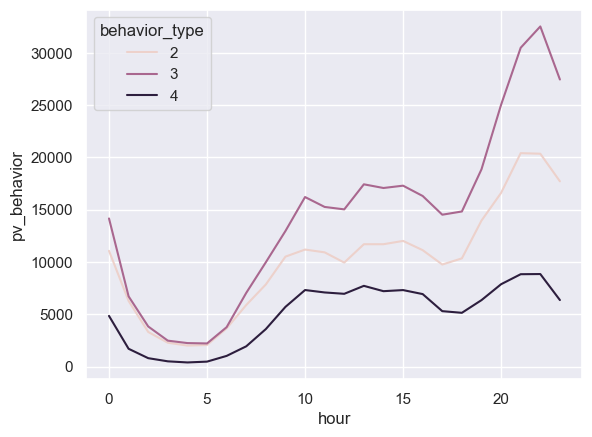

In [67]:
sns.lineplot(x='hour',y='pv_behavior',hue='behavior_type',data=pv_behavior[pv_behavior.behavior_type!=1])

<IPython.core.display.Javascript object>

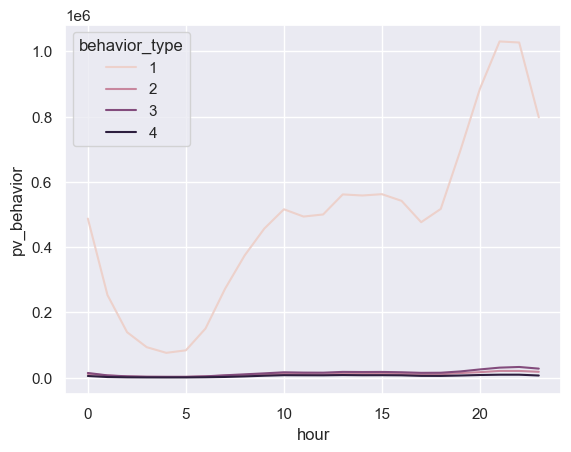

In [66]:
# 可视化
# sns: serborn
ax = sns.lineplot(x='hour',y='pv_behavior',hue='behavior_type',data=pv_behavior)

In [65]:
# 基于 behavior_type & hour 分组
# 点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示
pv_behavior = data_user.groupby(['behavior_type','hour'])['user_id'].count()
pv_behavior = pv_behavior.reset_index()
pv_behavior = pv_behavior.rename(columns={'user_id':'pv_behavior'})
pv_behavior

,behavior_type,hour,pv_behavior
0,1,0,487341
1,1,1,252991
2,1,2,139139
3,1,3,93250
4,1,4,75832
...,...,...,...
91,4,19,6352
92,4,20,7872
93,4,21,8829
94,4,22,8845


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='date'>

<AxesSubplot: xlabel='date'>

Text(0.5, 1.0, 'pv_daily')

Text(0.5, 1.0, 'uv_daily')

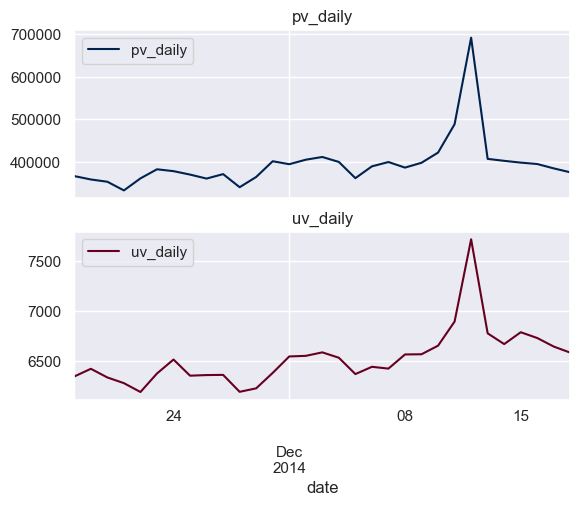

In [64]:
# 可视化
fig, axes = plt.subplots(2,1,sharex=True)
# pv_daily: pandas 对象
# Matplotlib, Pandas , histplot:  柱状图
pv_daily.plot(x='date', y='pv_daily', ax=axes[0], colormap='cividis')
uv_daily.plot(x='date', y='uv_daily', ax=axes[1], colormap='RdGy')
axes[0].set_title('pv_daily')
axes[1].set_title('uv_daily')

In [61]:
pv_daily.merge(uv_daily,on='date').head()

,date,pv_daily,uv_daily
0,2014-11-18,366701,6343
1,2014-11-19,358823,6420
2,2014-11-20,353429,6333
3,2014-11-21,333104,6276
4,2014-11-22,361355,6187


In [56]:
# 计算UV
# uv_daily = data_user.groupby('date')['user_id'].apply(lambda x: x.nunique())
uv_daily = data_user.groupby('date').agg({'user_id':lambda x:x.nunique()})
# uv_daily = data_user.groupby('date')['user_id'].apply(lambda x: len(x.unique()))
uv_daily = uv_daily.reset_index()
uv_daily = uv_daily.rename(columns = {'user_id':'uv_daily'})
uv_daily

,date,uv_daily
0,2014-11-18,6343
1,2014-11-19,6420
2,2014-11-20,6333
3,2014-11-21,6276
4,2014-11-22,6187
5,2014-11-23,6373
6,2014-11-24,6513
7,2014-11-25,6351
8,2014-11-26,6357
9,2014-11-27,6359


In [48]:
# 计算PV: PageView , UV: UniqueView
# PV: select count(user_id) from data_user group by "date";
# UV: select count(distinct(user_id)) from data_user group by "date";

pv_daily = data_user.groupby('date')['user_id'].count()
# pv_daily.head()
pv_daily = pv_daily.reset_index()
pv_daily = pv_daily.rename(columns={'user_id':'pv_daily'})
pv_daily

,date,pv_daily
0,2014-11-18,366701
1,2014-11-19,358823
2,2014-11-20,353429
3,2014-11-21,333104
4,2014-11-22,361355
5,2014-11-23,382702
6,2014-11-24,378342
7,2014-11-25,370239
8,2014-11-26,360896
9,2014-11-27,371384


In [47]:
data_user['user_id'] = data_user['user_id'].astype('object')
data_user['item_id'] = data_user['item_id'].astype('object')
data_user['item_category'] = data_user['item_category'].astype('object')
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['hour'] = data_user['hour'].astype('int64')

data_user.dtypes

user_id                  object
item_id                  object
behavior_type             int64
item_category            object
time                     object
date             datetime64[ns]
hour                      int64
dtype: object

In [45]:
# 分割天(date)和小时(hour)
data_user=data.copy()
data_user['date'] = data['time'].map(lambda x: x.split(' ')[0])
data_user['hour'] = data['time'].map(lambda x: x.split(' ')[1])
data_user.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21


In [ ]:
# 查看数据集量级
print('整体数据的大小为',len(data_user))

print('数据集中用户数量是：',len(set(data_user['user_id'])))
print('数据集中商品数量是：',len(set(data_user['item_id'])))
print('数据集中商品类别数量是：',len(set(data_user['item_category'])))

In [40]:
df.user_id.nunique()

10000

In [38]:
# 画图的主题设计
sns.set_theme()
sns.set_context('notebook')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
test[test['behavior_type']==2]['item_id'].value_counts()

257945770    8
236236780    6
270876059    6
32585501     6
75681830     6
            ..
387049019    1
216396545    1
25149880     1
395826893    1
212172659    1
Name: item_id, Length: 57406, dtype: int64

<AxesSubplot: >

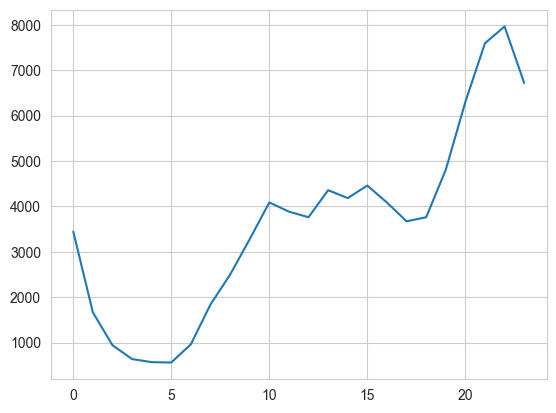

In [35]:
test[test['behavior_type']==3].hour.value_counts().sort_index().plot()

<AxesSubplot: >

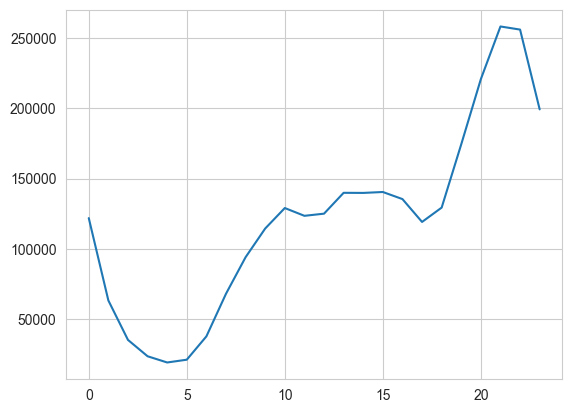

In [33]:
test[test['behavior_type']==1].hour.value_counts().sort_index().plot()

<AxesSubplot: >

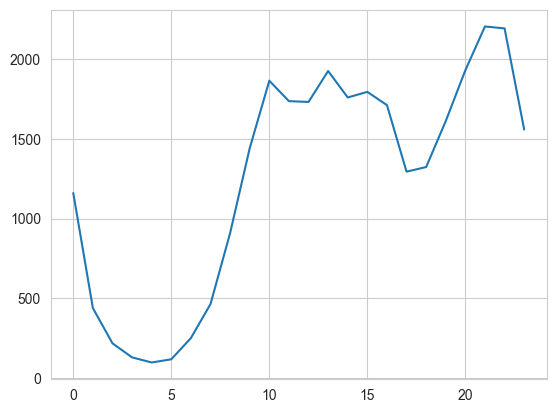

In [31]:
test[test['behavior_type']==4].hour.value_counts().sort_index().plot()

In [25]:
test[test['behavior_type']==1].shape
test[test['behavior_type']==1].user_id.nunique()
test[test['behavior_type']==1].user_id.value_counts().size

(2887873, 10)

9985

9985

In [16]:
test.user_id.nunique()
test.item_id.nunique()

9987

1509170

In [12]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df)
test.shape

(3064227, 10)

In [13]:
test.item_category.value_counts()

1863     98754
13230    89197
5027     83178
5894     82636
6513     73738
         ...  
8674         1
9371         1
4571         1
2171         1
137          1
Name: item_category, Length: 8162, dtype: int64

In [10]:
df.behavior_type.value_counts()

1    11550581
3      343564
2      242556
4      120205
Name: behavior_type, dtype: int64

In [9]:
df.time.describe()

C:\Users\fzh00\AppData\Local\Temp\ipykernel_14348\4192228143.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.time.describe()


count                12256906
unique                    744
top       2014-12-11 22:00:00
freq                    54797
first     2014-11-18 00:00:00
last      2014-12-18 23:00:00
Name: time, dtype: object

In [8]:
df['year']=df.time.dt.year
df['month']=df.time.dt.month
df['day']=df.time.dt.day
df['quarter']=df.time.dt.quarter
df['hour']=df.time.dt.hour
df.head()

,user_id,item_id,behavior_type,item_category,time,year,month,day,quarter,hour
0,98047837,232431562,1,4245,2014-12-06 02:00:00,2014,12,6,4,2
1,97726136,383583590,1,5894,2014-12-09 20:00:00,2014,12,9,4,20
2,98607707,64749712,1,2883,2014-12-18 11:00:00,2014,12,18,4,11
3,98662432,320593836,1,6562,2014-12-06 10:00:00,2014,12,6,4,10
4,98145908,290208520,1,13926,2014-12-16 21:00:00,2014,12,16,4,21


In [7]:
df['time']= pd.to_datetime(df['time'].astype(str))
df.head()

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02:00:00
1,97726136,383583590,1,5894,2014-12-09 20:00:00
2,98607707,64749712,1,2883,2014-12-18 11:00:00
3,98662432,320593836,1,6562,2014-12-06 10:00:00
4,98145908,290208520,1,13926,2014-12-16 21:00:00


In [ ]:
df = data.copy()

In [3]:
data.shape

(12256906, 5)

In [2]:
import os
os.chdir(r'C:\Users\fzh00\Downloads')
import pandas as pd
data = pd.read_csv('user_action.csv')
data.head(2)

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20


In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"